
### Business case Introduction

**Jamboree Education** is the most trusted Institute for GMAT, GRE, SAT, IELTS & TOEFL, and admission counseling since 1993. Over the years, we have guided thousands of students to realize their study abroad dreams.

### GOAL: To understand the important factors and predict chances of admission

Our analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission from an Indian perspective.


## Exploratory Data Analysis

In [124]:
## Exploratory Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data &Overview

In [125]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [126]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [127]:
df.shape

(500, 9)

In [128]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [129]:
display(df.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [130]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [131]:
df.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

### Unique Values

In [132]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

In [133]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [134]:
df['University_Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [135]:
df['LOR'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [136]:
df['Research'].unique()

array([1, 0], dtype=int64)

### Drop 'Serial No.'

In [137]:
df.drop('Serial No.', axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Distributions

Lets check the distributions of these features one by one

<AxesSubplot:>

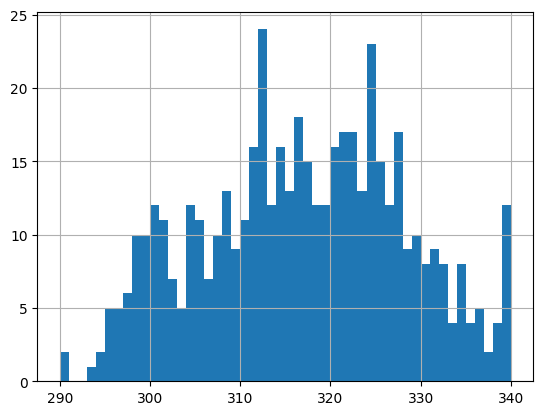

In [138]:
df['GRE Score'].hist(bins=50)

<AxesSubplot:>

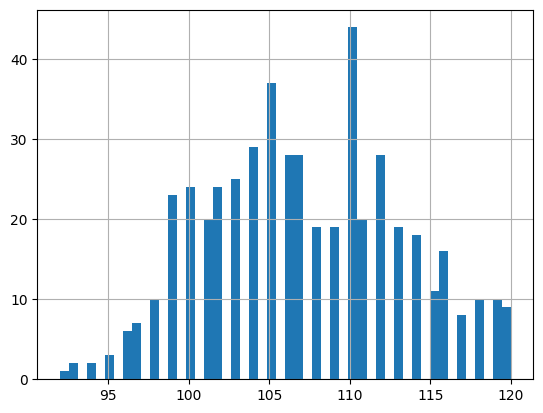

In [139]:
df['TOEFL Score'].hist(bins=50)

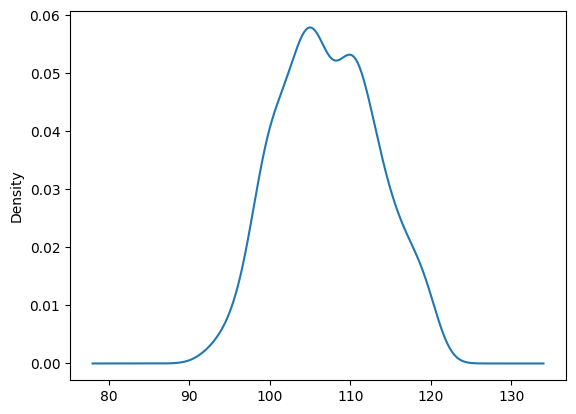

In [140]:
df["TOEFL Score"].plot.density();

### Correlations

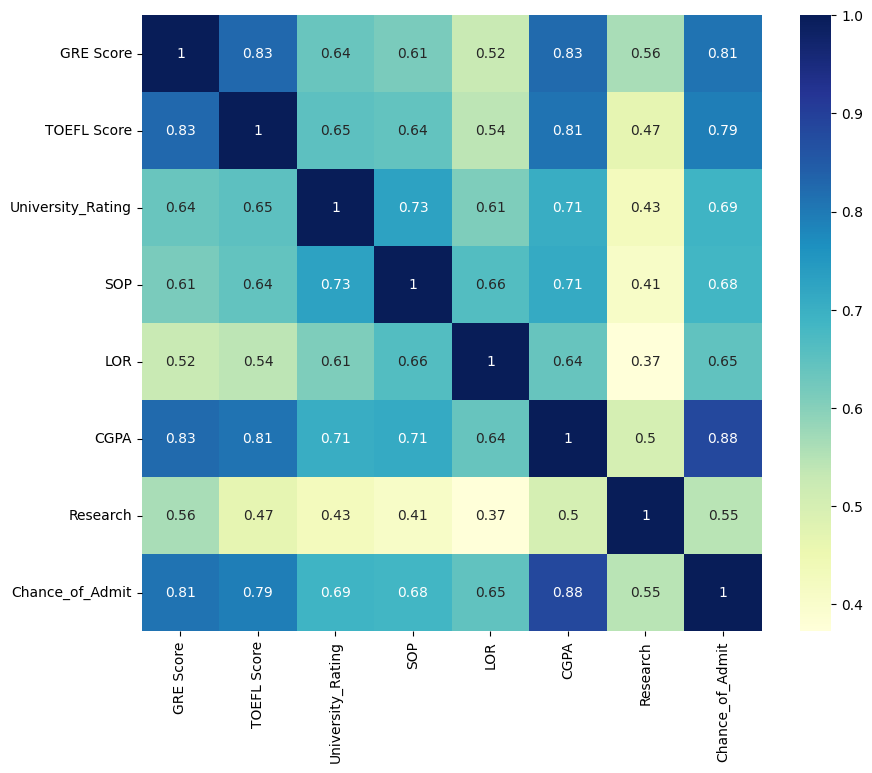

In [141]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

We see the following correlations:
- CGPA & GRE Score/TOEFL Score has high correlations compare with SOP & LOR


Another visualisation we can check, is the scatter plot of each feature with the target. This can be easily done using pairplot from seaborn library

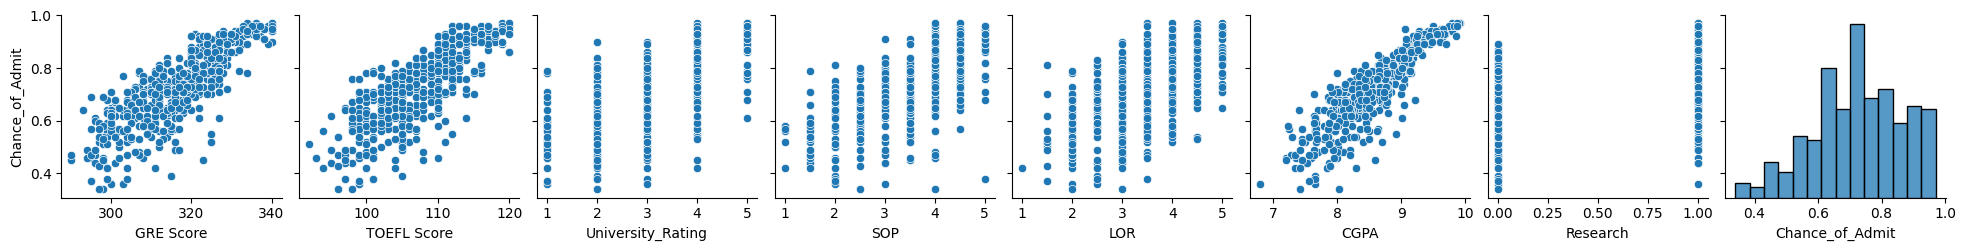

In [142]:
sns.pairplot(df, y_vars=['Chance_of_Admit']);

### Missing Values & Duplicate check

In [143]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [144]:
df.duplicated().sum()

0

We do not have any missing value and duplicate values

### Visualize using box-blot

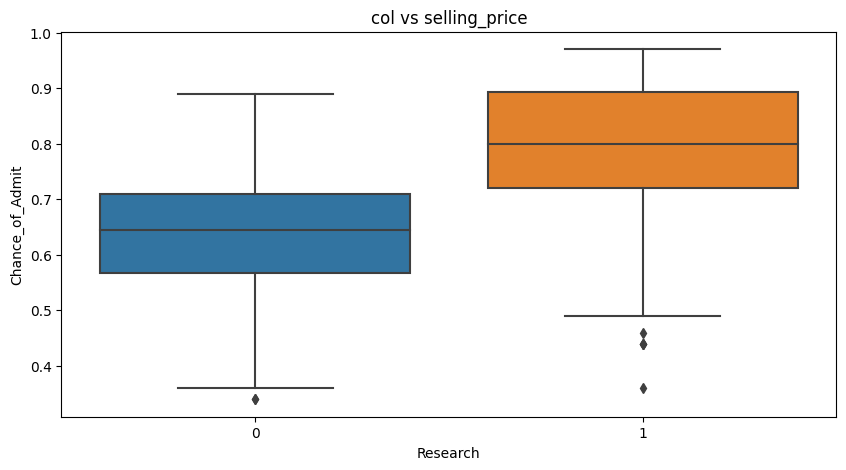

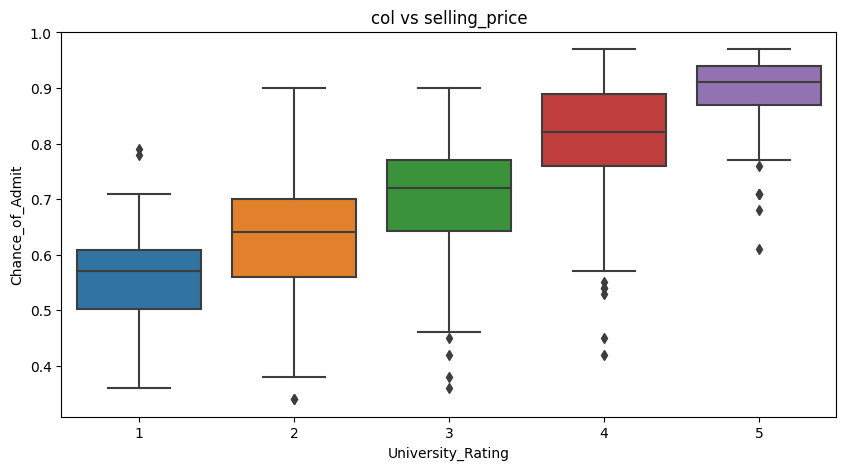

In [145]:
for col in ['Research', 'University_Rating']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='Chance_of_Admit',x=col, data=df)
    plt.title('col vs selling_price')
    plt.show()

Box-plot visualizations clearly shows
- who has presented research paper has high probability of admission
- High chance to getting admission in low rating (5) university compare with high rating university



### Data preparation for modeling (Standardization)


In [162]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
df_features = ['GRE Score', 'TOEFL Score', 'University_Rating','SOP', 'LOR', 'CGPA']
scaler.fit(df[df_features])
scaled_values = scaler.transform(df[df_features])  # returns numpy.ndarray not df.
# scaled_df = pd.DataFrame(scaled_values, columns=['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA'])
df[df_features] = pd.DataFrame(scaled_values, columns=df_features)
df.head()

,GRE Score,TOEFL Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,1,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,1,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,1,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,1,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,0,0.65


## Train Test split

In [163]:
from sklearn.model_selection import train_test_split
X = df[df_features]
y = df['Chance_of_Admit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"The X_train is :{X_train.shape}\nThe y_train is :{y_train.shape}\nThe X_test is :{X_test.shape}\nThe y_test is :{y_test.shape}")

The X_train is :(400, 6)
The y_train is :(400,)
The X_test is :(100, 6)
The y_test is :(100,)


## Model building

In [157]:
#Importing Package for LinearRegression
from sklearn.linear_model import  LinearRegression

#### Build the Linear Regression model

In [177]:
linearRegression = LinearRegression()
linearRegressionModel = linearRegression.fit(X_train, y_train)

#### Predict on Linear Regression model

In [204]:
y_predict_linear = linearRegression.predict(X_test)
y_predict_linear

array([0.9142154 , 0.78416876, 0.5834803 , 0.7174541 , 0.80997459,
       0.85953425, 0.47003766, 0.65347585, 0.81367869, 0.79907768,
       0.73874155, 0.7384625 , 0.65005139, 0.94139982, 0.81735965,
       0.51033732, 0.84004828, 0.57663673, 0.53459542, 0.5495287 ,
       0.6479278 , 0.55665289, 0.70915515, 0.79018762, 0.77478866,
       0.58269301, 0.94652396, 0.84452714, 0.63705828, 0.73130742,
       0.55934074, 0.74409302, 0.54984355, 0.85475307, 0.64614873,
       0.72752416, 0.55608412, 0.9568865 , 0.62398949, 0.69774414,
       0.97435141, 0.55486875, 0.65604294, 0.85434975, 0.9457562 ,
       0.58158   , 0.95975886, 0.83520809, 0.79272551, 0.92328755,
       0.88217179, 0.56606929, 0.7117401 , 0.52958167, 0.95556674,
       0.61291299, 0.9586384 , 0.75290286, 0.66510889, 0.47837841,
       0.61016932, 0.66361096, 0.60437673, 0.60078257, 0.43956423,
       0.59491905, 0.86105317, 0.89600636, 0.6676546 , 0.72046473,
       0.59845227, 0.78023391, 0.70615391, 0.56896969, 0.55577

In [184]:
linearRegression.score(X_test, y_test)

0.8126654490940698

#### Display model coefficients with column names

In [173]:
print(list(zip(linearRegressionModel.coef_, df_features)))

[(0.0274698317677278, 'GRE Score'), (0.01820227574564466, 'TOEFL Score'), (0.002934511612758515, 'University_Rating'), (0.0017955750966710642, 'SOP'), (0.015936923765260676, 'LOR'), (0.06798972916981369, 'CGPA')]


#### Lasso regression

In [179]:
from sklearn.linear_model import Ridge,Lasso

In [187]:
lasso_model=Lasso(alpha=0.010)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.01)

In [188]:
lasso_model.predict(X_test)

array([0.90323141, 0.77946312, 0.59278586, 0.72277745, 0.80821992,
       0.84787036, 0.49735252, 0.66284926, 0.81157202, 0.79035945,
       0.73838405, 0.74123165, 0.65174891, 0.9194866 , 0.81761224,
       0.53461694, 0.82539873, 0.59166968, 0.55683036, 0.55795623,
       0.65039358, 0.56462025, 0.70877948, 0.78295193, 0.77271107,
       0.59987941, 0.92490338, 0.832361  , 0.64529449, 0.72672272,
       0.57191778, 0.74897804, 0.56845264, 0.84338365, 0.64687853,
       0.72710581, 0.5773656 , 0.93427627, 0.62786015, 0.70199824,
       0.95237062, 0.56886145, 0.66402426, 0.83990042, 0.92825931,
       0.60112509, 0.94080364, 0.8221499 , 0.78066009, 0.90268996,
       0.8661412 , 0.57727168, 0.70592806, 0.5398611 , 0.93194765,
       0.61406616, 0.94621603, 0.753561  , 0.67109937, 0.4995474 ,
       0.62925179, 0.66962574, 0.6204749 , 0.60112117, 0.4669578 ,
       0.59743247, 0.84828585, 0.87714102, 0.6740408 , 0.72614216,
       0.60842649, 0.77570793, 0.71366871, 0.57806324, 0.57873

In [190]:
lasso_model.score(X_test, y_test)

0.8104585410940204

#### Ridge regression

In [195]:
ridge_model= Ridge(alpha=0.001)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [196]:
ridge_model.predict(X_test)

array([0.91421502, 0.78416862, 0.58348073, 0.71745395, 0.80997433,
       0.85953408, 0.47003775, 0.65347579, 0.81367819, 0.79907763,
       0.73874157, 0.73846238, 0.6500518 , 0.94139972, 0.81735917,
       0.51033722, 0.84004832, 0.57663662, 0.53459538, 0.54952907,
       0.64792791, 0.5566533 , 0.7091551 , 0.79018756, 0.77478862,
       0.58269302, 0.94652388, 0.8445271 , 0.63705836, 0.7313076 ,
       0.55934111, 0.74409282, 0.54984384, 0.85475288, 0.64614909,
       0.72752416, 0.55608386, 0.95688637, 0.62398977, 0.69774417,
       0.97435099, 0.55486885, 0.65604272, 0.85434975, 0.94575584,
       0.58157982, 0.95975856, 0.83520807, 0.79272556, 0.92328747,
       0.88217159, 0.56606948, 0.71174037, 0.52958196, 0.95556665,
       0.61291359, 0.9586378 , 0.75290282, 0.66510881, 0.47837871,
       0.61016895, 0.66361077, 0.60437655, 0.60078341, 0.43956431,
       0.59491982, 0.86105304, 0.89600626, 0.66765445, 0.72046439,
       0.59845232, 0.78023387, 0.70615345, 0.56897018, 0.55577

In [197]:
ridge_model.score(X_test, y_test)

0.8126654433199734

## Testing the assumptions of the linear regression model 

### VIF

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [202]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.78
0,GRE Score,4.10
1,TOEFL Score,3.90
3,SOP,2.83
2,University_Rating,2.61
4,LOR,2.03


- All VIF(Multicollinearity check) score is less than 5, no need to delete any feature

### The mean of residuals

In [212]:
error = y_test - y_predict_linear
mean_error = np.average(error)
mean_error

-0.004200409779017616

Mean of error almost near to zero

### Linearity of variables & Test for Homoscedasticity

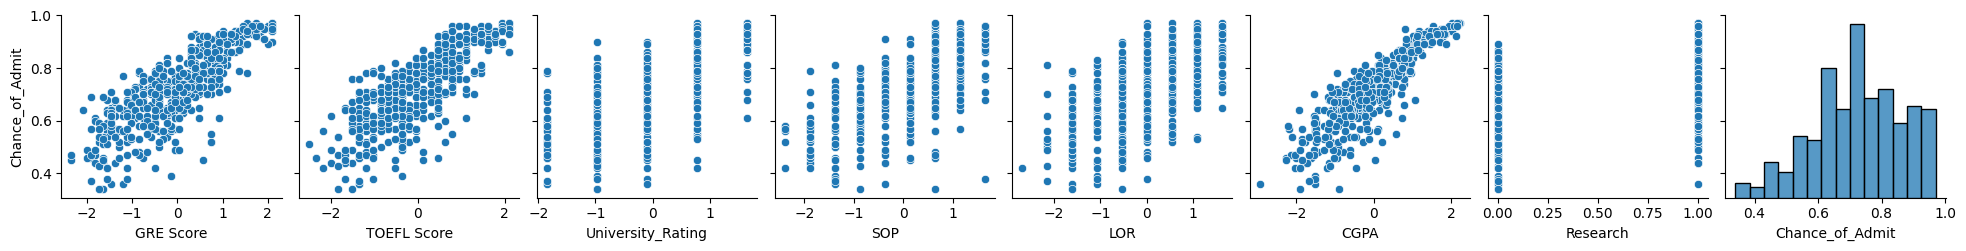

In [213]:
sns.pairplot(df, y_vars=['Chance_of_Admit']);

#### From the pair plot we can see
    - No Hetroscedasticity
    - Data looks linear

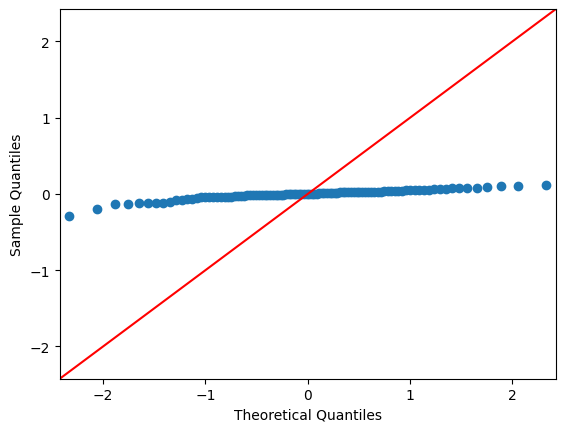

In [216]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers everytime the code is executed.
data_points = np.random.normal(0, 1, 1000)     
  
sm.qqplot(error, line ='45') 
py.show()


- The mean of residuals is nearly zero

## Model performance evaluation

In [160]:
# Metrics checked - MAE, RMSE, R2, Adj R2
# Train and test performances are checked
# Comments on the performance measures and if there is any need to improve the model or not

#### MAE

In [217]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_predict_linear))


MAE 0.042990193111432


#### RMSE

In [219]:
from sklearn.metrics import mean_squared_error
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict_linear)))

RMSE 0.061895004370516635


#### R Square(R2)

In [220]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predict_linear)
print(r2)

0.8126654490940698


#### Adjusted R2

In [221]:
n=500
d=7
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-d-1))
print(adj_r2_score)

0.8100001201177659


#### Performance of the model is not yet good, it needs to be improved

### Actionable Insights & Recommendations

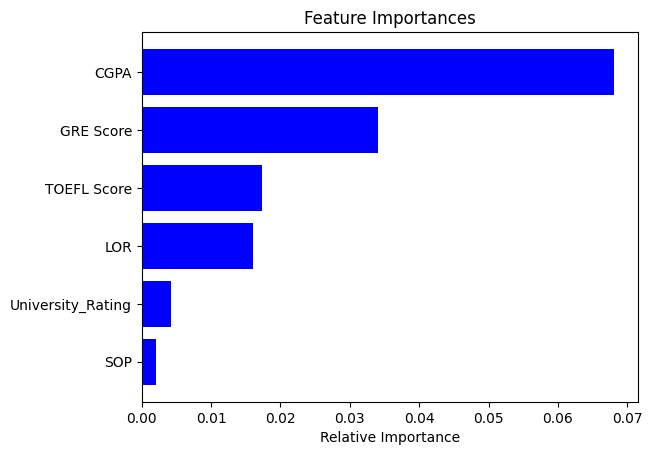

In [231]:
features = df.columns
importances = linearRegressionModel.coef_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### As per analysis More important features are follows the following order

        - CGPA
        - GRE Score
        - TOEFL Score
        - LOR

### By improving the performance of the model we can provide accurate information about how they are shortlisted